In [48]:
import pandas as pd
import glob
import os
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
root_path = '/Volumes/UCDN/datasets/IDM'
save_dir = os.path.join(root_path, 'confidence_scores')

Define the file path

In [50]:
file_paths = glob.glob(os.path.join(root_path, 'raw_csv', '*.csv'))

Define an empty dataframe 

In [51]:
cols = ['File', 'Confidence Average Block 1', 'Confidence Average Block 2', 'Confidence Average Block 3', 'Confidence Average Block 4', 'Risk Amount', "All Average", "Count", "Ambiguity Amount", "Risk Amount All"]
averages_df = pd.DataFrame(columns=cols)

Loop through each participant CSV file

In [52]:
for file_path in file_paths:
    df = pd.read_csv(file_path)
    
    # Filter the dataframe to include only low_vol_low_risk
    block1_df = df[df['cpdm_run_dimension'] == 'low_vol_low_risk']
    
    # Filter the dataframe to include only low_vol_high_risk
    block2_df = df[df['cpdm_run_dimension'] == 'low_vol_high_risk']
    
    # Filter the dataframe to include only high_vol_low_risk
    block3_df = df[df['cpdm_run_dimension'] == 'high_vol_low_risk']
    
    # Filter the dataframe to include only high_vol_high_risk
    block4_df = df[df['cpdm_run_dimension'] == 'high_vol_high_risk']
    
    # Filter for ambiguity level 0 
    ambiguity_level = df[df['crdm_amb_lev'] > 0]
    
    # Filter for ambiguity level 0 
    risk_level = df[df['crdm_amb_lev'] == 0]
    
    # Calculate the average of column 'cpdm_conf' for block 1
    block1_average = block1_df['cpdm_conf'].mean()
    
    # Calculate the average of column 'cpdm_conf' for block 2
    block2_average = block2_df['cpdm_conf'].mean()
    
    # Calculate the average of column 'cpdm_conf' for block 3
    block3_average = block3_df['cpdm_conf'].mean()
    
    # Calculate the average of column 'cpdm_conf' for block 4
    block4_average = block4_df['cpdm_conf'].mean()
    
    ambiguity_choice = ambiguity_level['crdm_choice'].mean()
    
    risk_choice = risk_level['crdm_choice'].mean()
    
    risk_choice_all = df['crdm_choice'].mean()
    
    all_average = df['cpdm_conf'].mean()
    
    count = df['cpdm_conf'].sum()
    
    # Extract the file name from the file path
    file_name = os.path.basename(file_path).replace('.csv', '')
    
    # Add the file name and averages to the  dataframe
    row = [file_name,block1_average,block2_average,block3_average,block4_average,ambiguity_choice,risk_choice,risk_choice_all,count,all_average]
    row_df = pd.DataFrame([row],columns=cols)
    averages_df = pd.concat([averages_df,row_df],ignore_index=True)
    # averages_df = averages_df.append({'File': file_name, 'Confidence Average Block 1': block1_average, 
    #                                   'Confidence Average Block 2': block2_average, 
    #                                   'Confidence Average Block 3': block3_average, 
    #                                   'Confidence Average Block 4': block4_average, 
    #                                   'Ambiguity Amount': ambiguity_choice, 
    #                                   'Risk Amount': risk_choice, 
    #                                   'Risk Amount All': risk_choice_all,
    #                                   'Count': count, 
    #                                   'All Average': all_average},
    #                                  ignore_index=True)

Calculate the low confidence average

In [53]:
averages_df['Confidence Average Low'] = (averages_df['Confidence Average Block 1'] + averages_df['Confidence Average Block 3']) / 2
print(averages_df[['Confidence Average Block 1','Confidence Average Block 3','Confidence Average Low']])

     Confidence Average Block 1  Confidence Average Block 3   
0                         0.070                       0.015  \
1                         0.380                       0.345   
2                         0.025                       0.045   
3                         0.130                       0.110   
4                         0.485                       0.315   
..                          ...                         ...   
144                       0.415                       0.310   
145                       0.775                       0.575   
146                       0.645                       0.675   
147                       0.625                       0.830   
148                       0.450                       0.305   

     Confidence Average Low  
0                    0.0425  
1                    0.3625  
2                    0.0350  
3                    0.1200  
4                    0.4000  
..                      ...  
144                  0.3625  
145

Calculate the high confidence average

In [54]:
averages_df['Confidence Average High'] = (averages_df['Confidence Average Block 2'] + averages_df['Confidence Average Block 4']) / 2

Save the averages dataframe to a CSV file

In [55]:
averages_df.to_csv(os.path.join(save_dir, 'conf_averages.csv'), index=False)

Compute difference 

In [166]:
averages_df['Difference'] = averages_df['Confidence Average High'] - averages_df['Confidence Average Low']
print(averages_df[['Difference','Confidence Average High','Confidence Average Low']])

     Difference  Confidence Average High  Confidence Average Low
0        0.0825                   0.1250                  0.0425
1        0.0750                   0.4375                  0.3625
2        0.0125                   0.0475                  0.0350
3        0.2825                   0.4025                  0.1200
4        0.1550                   0.5550                  0.4000
..          ...                      ...                     ...
144      0.0700                   0.4325                  0.3625
145      0.0075                   0.6825                  0.6750
146      0.0050                   0.6650                  0.6600
147      0.0325                   0.7600                  0.7275
148      0.1125                   0.4900                  0.3775

[149 rows x 3 columns]


In [57]:
average_df = averages_df.rename(columns={'File': 'subject'})

Load Dataframe

In [58]:
root_dir = '/Volumes/UCDN/datasets/IDM'
df_aggregate = pd.read_csv(os.path.join(root_dir,"Aggregate_All_Model_Parameters.csv"))
print(list(df_aggregate))
['subject', 'cpdm_conf_crit_b1', 'cpdm_conf_crit_b2','cpdm_conf_crit_b3', 'cpdm_conf_crit_b4', 'crdm_alpha']

['subject', 'cdd_meta', 'cdd_meta_negLL', 'cdd_conf_crit_1', 'cdd_conf_crit_2', 'cdd_alpha_meta', 'cdd_alpha_meta_negLL', 'cdd_alpha_conf_crit_1', 'cdd_alpha_conf_crit_2', 'crdm_meta', 'crdm_meta_negLL', 'crdm_conf_crit_1', 'crdm_conf_crit_2', 'crdm_meta_max_flag', 'cdd_meta_max_flag', 'cpdm_b1_meta', 'cpdm_b1_meta_negLL', 'cpdm_conf_crit_b1', 'cpdm_b2_meta', 'cpdm_b2_meta_negLL', 'cpdm_conf_crit_b2', 'cpdm_b3_meta', 'cpdm_b3_meta_negLL', 'cpdm_conf_crit_b3', 'cpdm_b4_meta', 'cpdm_b4_meta_negLL', 'cpdm_conf_crit_b4', 'cpdm_meta_max_flag', 'cpdm_conf_low', 'cpdm_conf_high', 'cpdm_confidence_flag', 'cpdm_avg_meta', 'crdm_negLL', 'crdm_percent_lottery', 'crdm_percent_risk', 'crdm_percent_ambiguity', 'crdm_gamma', 'crdm_beta', 'crdm_alpha', 'crdm_AIC', 'crdm_BIC', 'crdm_R2', 'crdm_prob_span', 'crdm_conf_1', 'crdm_conf_2', 'crdm_conf_3', 'crdm_conf_4', 'crdm_confidence_flag', 'cdd_negLL', 'cdd_percent_impulse', 'cdd_gamma', 'cdd_kappa', 'cdd_alpha', 'cdd_AIC', 'cdd_BIC', 'cdd_R2', 'cdd_prob

['subject',
 'cpdm_conf_crit_b1',
 'cpdm_conf_crit_b2',
 'cpdm_conf_crit_b3',
 'cpdm_conf_crit_b4',
 'crdm_alpha']

df_aggregate = df_aggregate[df_aggregate['cpdm_confidence_flag'] == 0]

Compute the mean for the confidence criteria in each block 

In [59]:
block1 = 'cpdm_conf_crit_b1'
block3 = 'cpdm_conf_crit_b3'
block2 = 'cpdm_conf_crit_b2'
block4 = 'cpdm_conf_crit_b4'

In [60]:
block1_mean = df_aggregate['cpdm_conf_crit_b1'].mean()
block2_mean = df_aggregate['cpdm_conf_crit_b2'].mean()
block3_mean = df_aggregate['cpdm_conf_crit_b3'].mean()
block4_mean = df_aggregate['cpdm_conf_crit_b4'].mean()

Compute average for high incentive blocks

In [61]:
block2 = 'cpdm_conf_crit_b2'
block4 = 'cpdm_conf_crit_b4'
high_incentive_confidence = 'high_incentives_conf_scores'

In [62]:
df_aggregate[high_incentive_confidence] = (df_aggregate[block2] + df_aggregate[block4]) / 2
print(df_aggregate[high_incentive_confidence])

0      0.497486
1      0.010000
2      2.185632
3      0.862378
4      0.963740
         ...   
144    2.457312
145    1.458996
146    4.330690
147    2.045520
148    0.131500
Name: high_incentives_conf_scores, Length: 149, dtype: float64


In [63]:
high_incentive_confidence_mean = df_aggregate['high_incentives_conf_scores'].mean()

Compute average for low incentive blocks

In [64]:
block1 = 'cpdm_conf_crit_b1'
block3 = 'cpdm_conf_crit_b3'
low_incentive_confidence = 'low_incentives_conf_scores'

In [65]:
df_aggregate[low_incentive_confidence] = (df_aggregate[block1] + df_aggregate[block3]) / 2
print(df_aggregate[low_incentive_confidence])

0      0.238058
1      0.015519
2      3.116866
3      5.100000
4      1.438245
         ...   
144    1.897846
145    5.100000
146    5.100000
147    3.100316
148    0.168888
Name: low_incentives_conf_scores, Length: 149, dtype: float64


In [66]:
low_incentive_confidence_mean = df_aggregate['low_incentives_conf_scores'].mean()

Compute difference between high and low incentive confidence scores

In [67]:
high_incentive_confidence = 'high_incentives_conf_scores'
low_incentive_confidence = 'low_incentives_conf_scores'
incentive_conf_difference = 'incentives_confidence_difference'

In [68]:
df_aggregate[incentive_conf_difference] = df_aggregate[high_incentive_confidence] - df_aggregate[low_incentive_confidence]

In [69]:
incentive_difference_confidence_mean = df_aggregate['incentives_confidence_difference'].mean()

Merge or join the datasets based on subject ID

In [70]:
print(df_aggregate.shape)
print(average_df.shape)
merged_data = pd.merge(df_aggregate, average_df, on='subject')

(149, 74)
(149, 13)


In [71]:
print(merged_data.shape)

(149, 86)


In [72]:
merged_data_filtered = merged_data[merged_data['cpdm_confidence_flag'] == 0]

In [73]:
print(merged_data_filtered.shape)

(139, 86)


In [74]:
merged_data_filtered = merged_data_filtered[merged_data_filtered['crdm_R2'] > 0.5]

In [75]:
print(merged_data_filtered.shape)

(102, 86)


In [76]:
merged_data_filtered = merged_data_filtered[merged_data_filtered['crdm_prob_span'] > 0.95]

In [77]:
print(merged_data_filtered.shape)

(96, 86)


In [78]:
x1 = merged_data_filtered['Difference']
y1 = merged_data_filtered['Risk Amount']

In [79]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.015008854455277743 0.8846019679689134


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2284391777.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


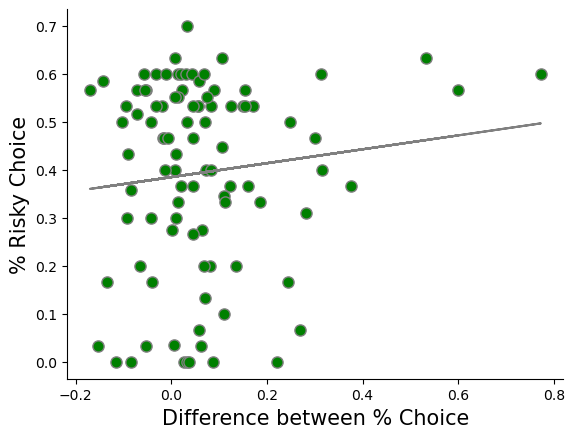

In [80]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Difference between % Choice', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [81]:
plt.show()

In [82]:
x1 = merged_data_filtered['incentives_confidence_difference']
y1 = merged_data_filtered['crdm_alpha']

In [83]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.07258545849158979 0.48217980329588117


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/397678790.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


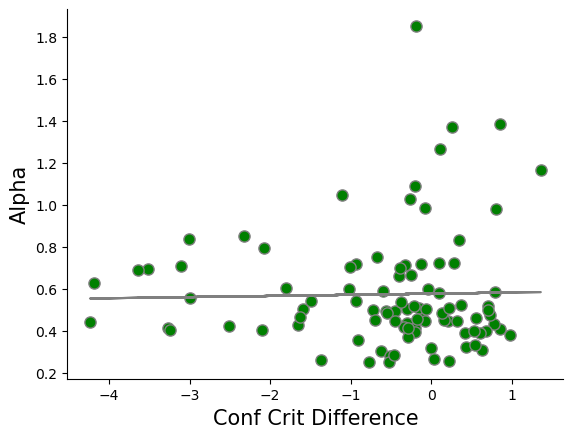

In [84]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Conf Crit Difference', fontsize=15)
plt.ylabel('Alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [85]:
plt.show()

In [86]:
x1 = merged_data_filtered['Confidence Average High']
y1 = merged_data_filtered['Risk Amount']

In [87]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.19865522183894097 0.05234279829848317


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2324156109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


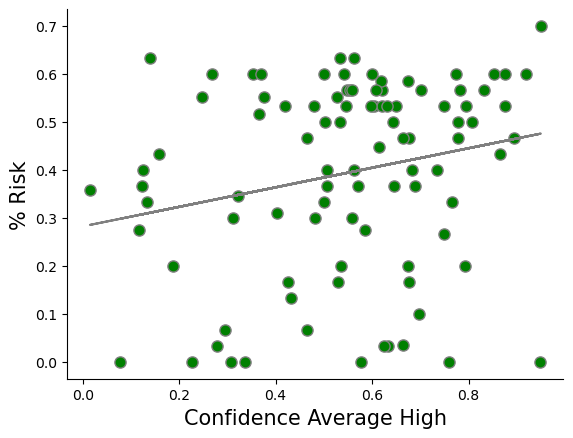

In [88]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Confidence Average High', fontsize=15)
plt.ylabel('% Risk', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [89]:
plt.show()

In [90]:
x1 = merged_data['Confidence Average High']
y1 = merged_data['Risk Amount']

In [91]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.21540992728809483 0.008331876371694951


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2324156109.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


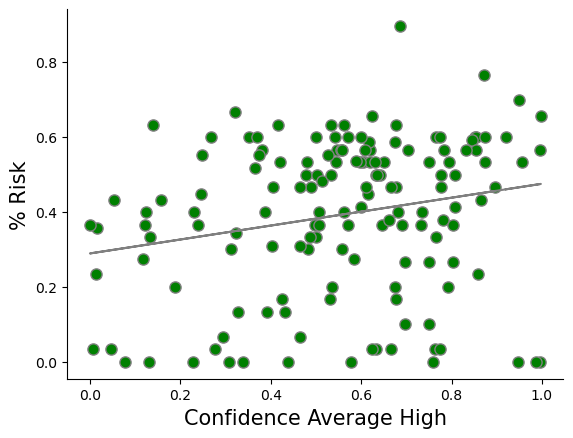

In [92]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Confidence Average High', fontsize=15)
plt.ylabel('% Risk', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [93]:
plt.show()

In [94]:
x1 = merged_data_filtered['high_incentives_conf_scores']
y1 = merged_data_filtered['crdm_alpha']

In [95]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.11676614215952252 0.2572295164327464


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2689833569.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


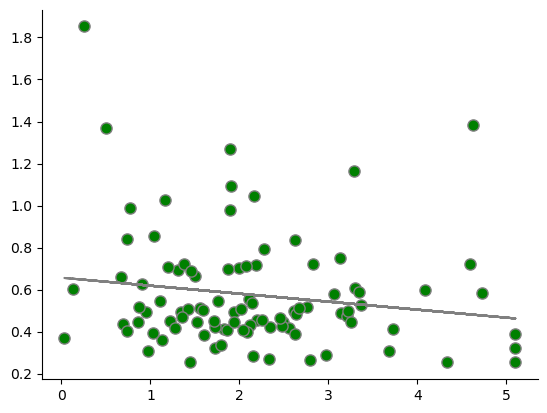

In [96]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [97]:
plt.show()

 TESTS

Low incentive sanity check

In [98]:
x1 = merged_data['Confidence Average Low']
y1 = merged_data['low_incentives_conf_scores']

In [99]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.9057007981417309 1.1756624887306153e-56


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/391529368.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


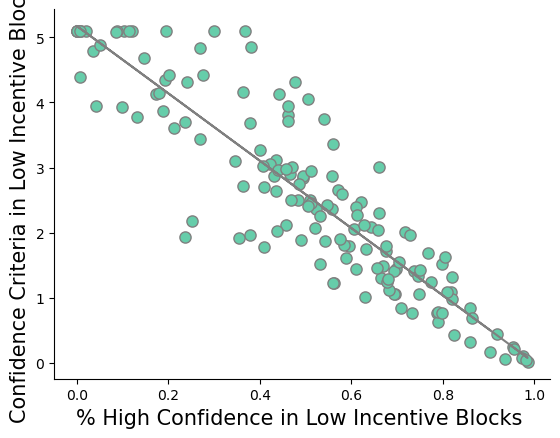

In [100]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='mediumaquamarine', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% High Confidence in Low Incentive Blocks ', fontsize=15)
plt.ylabel('Confidence Criteria in Low Incentive Blocks ', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [101]:
plt.show()

High incentive sanity check

In [102]:
x1 = merged_data['Confidence Average High']
y1 = merged_data['high_incentives_conf_scores']

In [103]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.8985469393675926 1.9398430522501527e-54


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/256578775.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


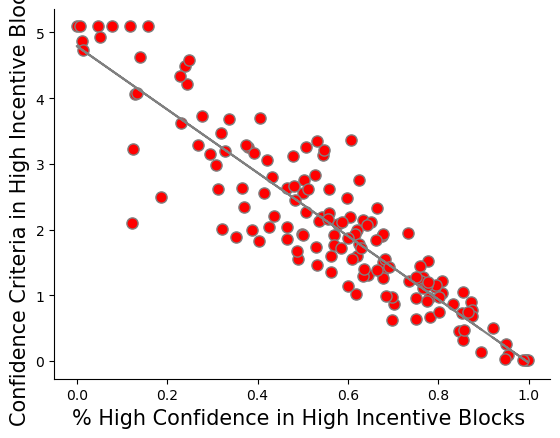

In [104]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='red', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% High Confidence in High Incentive Blocks ', fontsize=15)
plt.ylabel('Confidence Criteria in High Incentive Blocks ', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [105]:
plt.show()

Difference sanity check

In [106]:
x1 = merged_data['Difference']
y1 = merged_data['incentives_confidence_difference']

In [107]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.9051388170667413 1.7815638034076578e-56


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/400219060.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


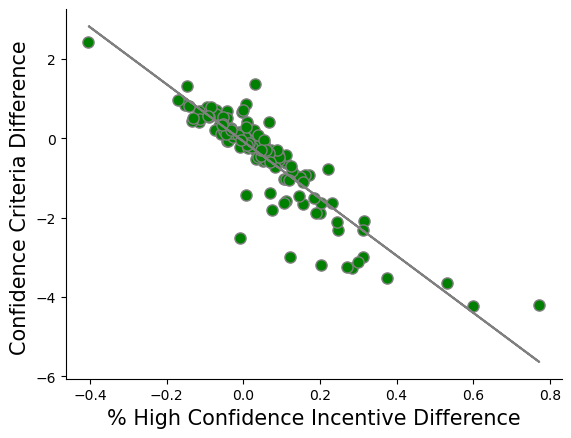

In [108]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% High Confidence Incentive Difference', fontsize=15)
plt.ylabel('Confidence Criteria Difference ', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [109]:
plt.show()

Risk sanity check 

In [110]:
x1 = merged_data['Risk Amount']
y1 = merged_data['crdm_alpha']

In [111]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.6589256308581298 6.556508402153172e-20


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2498566990.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


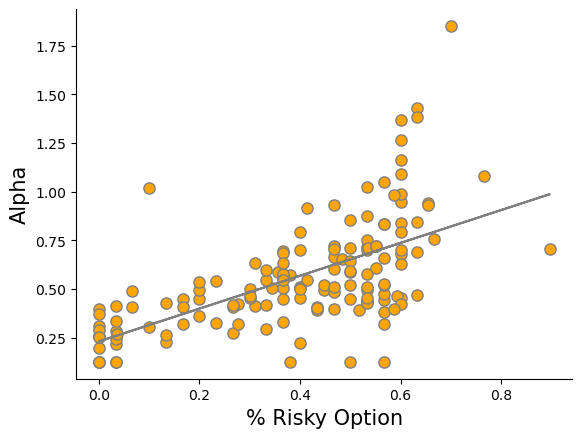

In [112]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='orange', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Risky Option', fontsize=15)
plt.ylabel('Alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [113]:
plt.show()

# Tests within % choice

In [114]:
x1 = merged_data['Confidence Average Low']
y1 = merged_data['Confidence Average High']

In [115]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.8381392319929195 1.572971133680555e-40


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1085490989.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


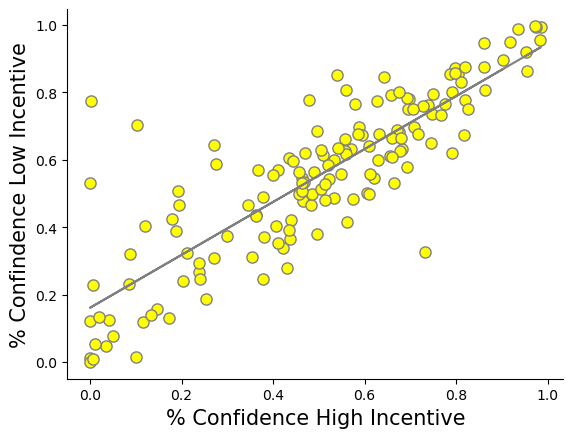

In [116]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='yellow', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High Incentive', fontsize=15)
plt.ylabel('% Confindence Low Incentive', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [117]:
plt.show()

In [118]:
x1 = merged_data['high_incentives_conf_scores']
y1 = merged_data['low_incentives_conf_scores']

In [119]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.6764193723925267 2.882553117678373e-21


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1352316492.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


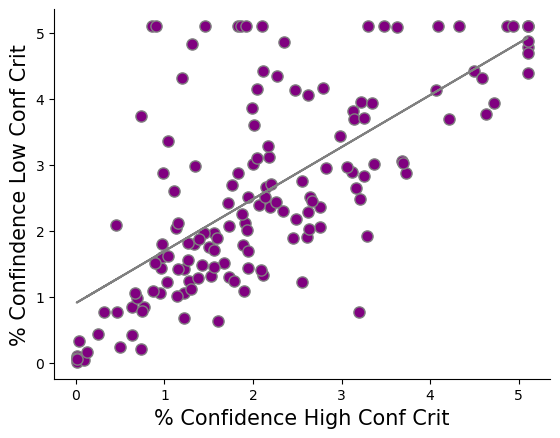

In [120]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='purple', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High Conf Crit', fontsize=15)
plt.ylabel('% Confindence Low Conf Crit', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [121]:
plt.show()

In [122]:
x1 = merged_data['Confidence Average Low']
y1 = merged_data['Risk Amount']

In [123]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.11064728980939491 0.17915014208007426


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/3470077133.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


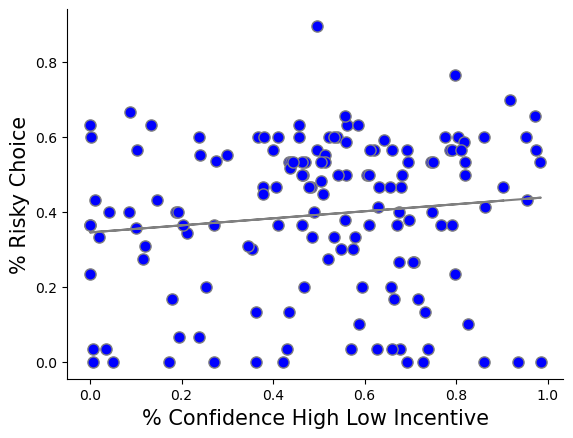

In [124]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='blue', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High Low Incentive', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [125]:
plt.show()

In [126]:
x1 = merged_data['Confidence Average Low']
y1 = merged_data['crdm_alpha']

In [127]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.005493972237147332 0.9469811996634134


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/3470077133.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


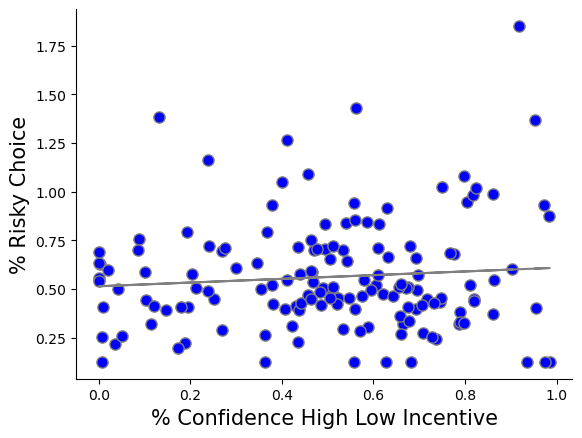

In [128]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='blue', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High Low Incentive', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [129]:
plt.show()

In [130]:
alpha = df_aggregate['crdm_alpha']

In [131]:
log_alpha = np.log10(alpha)

In [132]:
x1 = averages_df['Confidence Average Low']
y1 = log_alpha

In [133]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.011283641180470995 0.891363763488247


In [134]:
x1 = merged_data['Confidence Average High']
y1 = merged_data['Risk Amount']

In [135]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.21540992728809483 0.008331876371694951


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2073966349.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


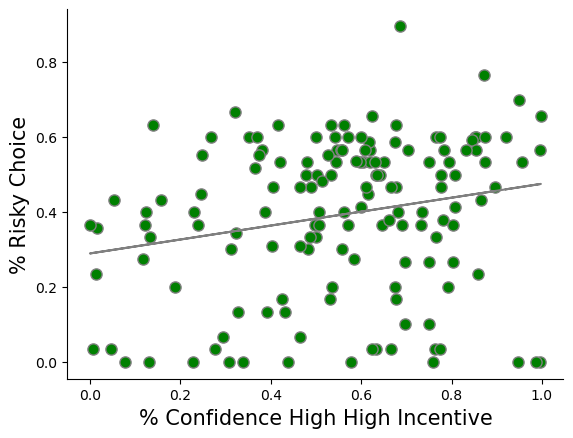

In [136]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High High Incentive', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [137]:
plt.show()

In [138]:
x1 = merged_data['Confidence Average High']
y1 = merged_data['crdm_alpha']

In [139]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.08391678808047726 0.3089136496689546


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/3627315389.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


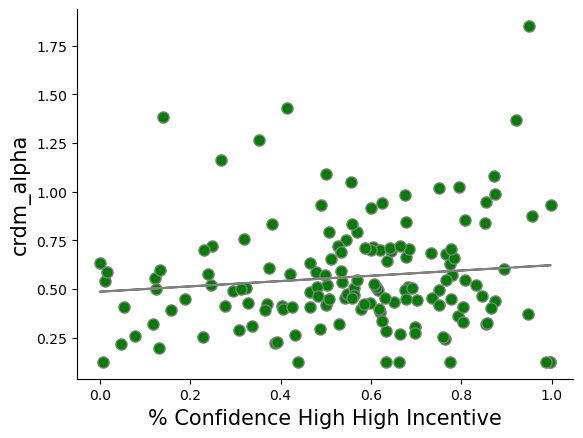

In [140]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High High Incentive', fontsize=15)
plt.ylabel('crdm_alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [141]:
plt.show()

In [142]:
x1 = merged_data['Confidence Average High']
y1 = log_alpha

In [143]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.08391678808047726 0.3089136496689546


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/2073966349.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


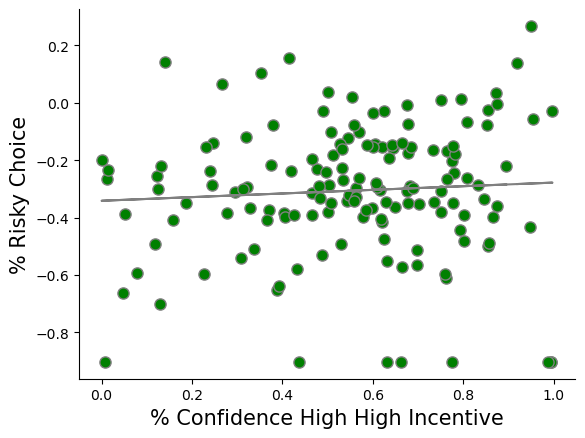

In [144]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Confidence High High Incentive', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [145]:
plt.show()

In [146]:
x1 = merged_data['Difference']
y1 = merged_data['Risk Amount']

In [147]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.09288907098871728 0.2598505387351923


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/3172693058.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


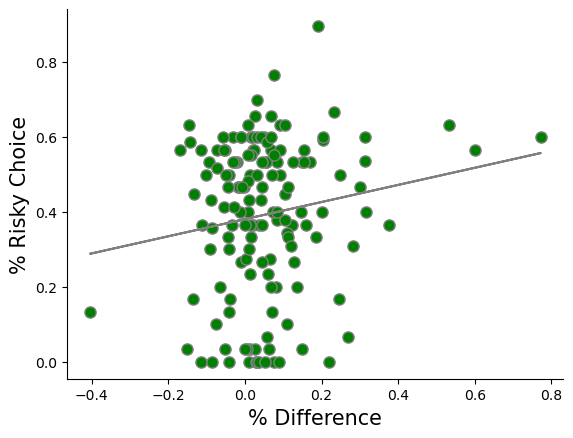

In [148]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Difference', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [149]:
plt.show()

In [150]:
x1 = merged_data['Difference']
y1 = log_alpha

In [151]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.09951790738810945 0.22722408105512534


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1517910871.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


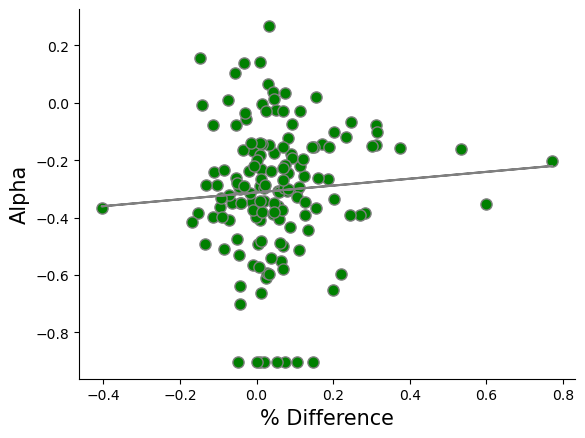

In [152]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('% Difference', fontsize=15)
plt.ylabel('Alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [153]:
plt.show()

In [154]:
x1 = merged_data['incentives_confidence_difference']
y1 = merged_data['Risk Amount']

In [155]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.07450789394304033 0.3664827519583157


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1826248303.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


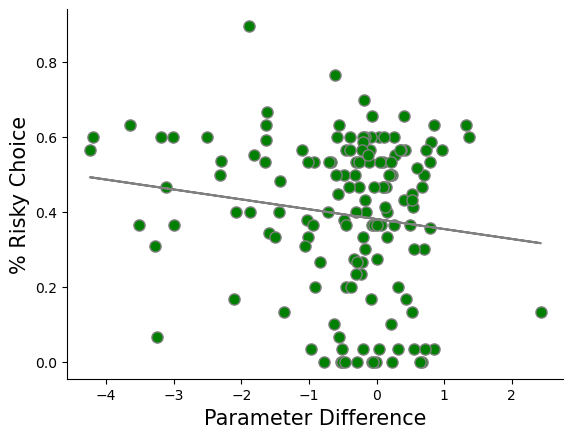

In [156]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Parameter Difference', fontsize=15)
plt.ylabel('% Risky Choice', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [157]:
plt.show()

In [158]:
x1 = merged_data['incentives_confidence_difference']
y1 = merged_data['crdm_alpha']

In [159]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

-0.07197900096717821 0.38301836406126755


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1007951126.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


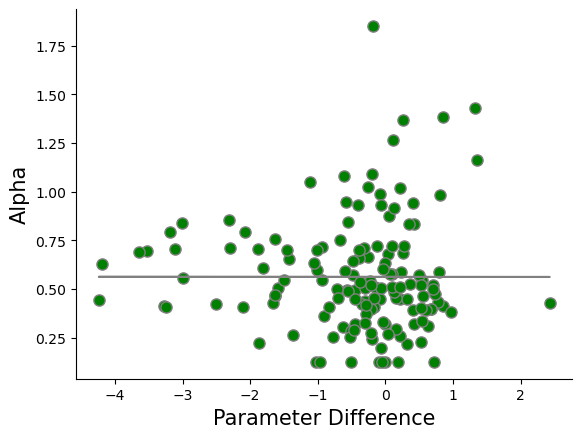

In [160]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Parameter Difference', fontsize=15)
plt.ylabel('Alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [161]:
plt.show()

In [162]:
y1 = merged_data['Risk Amount All']
x1 = merged_data['crdm_alpha']

In [163]:
correlation, p_value = spearmanr(x1, y1)
print(correlation, p_value)

0.03583045055028086 0.6644174744787827


/var/folders/ts/wpzrly5j2yxb42zf5v0w5rvh0000gs/T/ipykernel_92455/1947596169.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, a*x1+b, 'r-', color='gray')


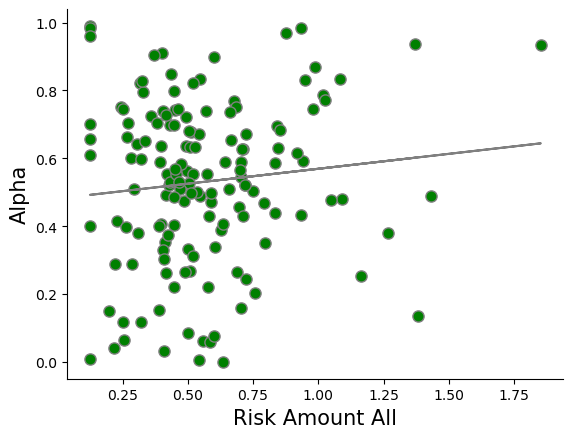

In [164]:
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green', edgecolors='gray', s=65)
plt.plot(x1, a*x1+b, 'r-', color='gray')
plt.xlabel('Risk Amount All', fontsize=15)
plt.ylabel('Alpha', fontsize=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [165]:
plt.show()